In [48]:
import numpy as np
import matplotlib.pyplot as plt
import json
plt.rcParams.update({'font.size':20})

In [53]:
simulation_data = np.genfromtxt('../../../csv/test.csv', delimiter=',')
y = np.zeros((4,len(simulation_data)))
for i in range(len(simulation_data)):
    y[0,i] = simulation_data[i,0]
    y[1,i] = simulation_data[i,1]
    y[2,i] = simulation_data[i,2]
    y[3,i] = simulation_data[i,3]

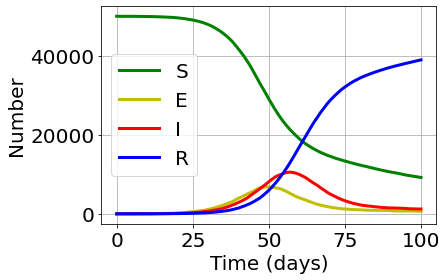

In [54]:
labels = ['S', 'E', 'I', 'R']
colours = ['g', 'y', 'r', 'b']
plt.Figure(figsize=(10,7))
for i in range(4):
    plt.plot(y[i], label = labels[i], linewidth = 3, c = colours[i])
# plt.plot(simulation_data,label =['S', 'E', 'I', 'R'], linewidth = 3, col = ['g', 'y', 'r', 'b'])
# plt.xlim([0,100])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
plt.savefig('../../../figures/random_graph_model_figs/SIR_random_graph.png', bbox_inches = 'tight')
plt.show()

In [4]:
with open('../../../csv/BA_results_infections_SIRS_0.01.json', 'r') as file:
    infections = json.load(file)
# print(infections)

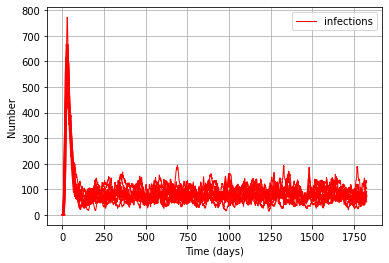

In [5]:
plt.Figure(figsize=(10,7))
for i in range(len(infections['infections'])-1):
    plt.plot(infections['infections'][i],'r', linewidth = 1)
plt.plot(infections['infections'][i],'r', linewidth = 1, label = 'infections')
# plt.xlim([0,100])
plt.ylabel('Number')
plt.xlabel('Time (days)')
plt.legend()
plt.grid(0.3)
plt.savefig('../../../figures/random_graph_model_figs/infections_random_graph_0.02_SIRS.png', bbox_inches = 'tight')
plt.show()
# 35 seconds

# Degree Distribution from SBM  

In [6]:
with open('../../../json/SBM_network.json', 'r') as file:
    network = json.load(file)

In [7]:
np.mean(network['network_struct']['degrees'])

6.38616

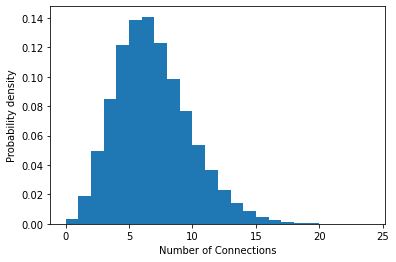

In [8]:
n = np.max(network['network_struct']['degrees'])
plt.hist(network['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM')
plt.show()

With weighted nodes

In [9]:
with open('../../../json/SBM_network_weight.json', 'r') as file:
    network = json.load(file)

In [10]:
np.mean(network['network_struct']['degrees'])

4.9089

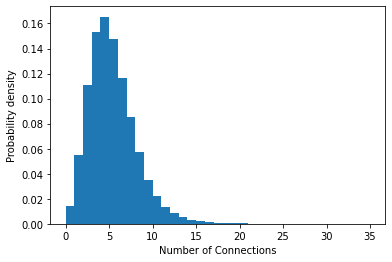

In [11]:
n = np.max(network['network_struct']['degrees'])
plt.hist(network['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM')
plt.show()

In [22]:
simulation_data = np.genfromtxt('../../../csv/test2.csv', delimiter=',')

(array([0.38136456, 0.35641548, 0.18049898, 0.05880855, 0.02291242]),
 array([0., 1., 2., 3., 4., 5.]),
 <BarContainer object of 5 artists>)

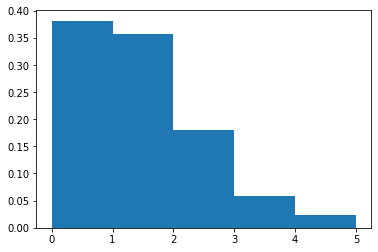

In [23]:
plt.hist(simulation_data, bins=list(range(0,int(max(simulation_data)))), density=True)

# Degree Distributions

### Period 1 Config

In [3]:
with open('../model_output_files/network_config1.json', 'r') as file:
    network1 = json.load(file)

17.43472


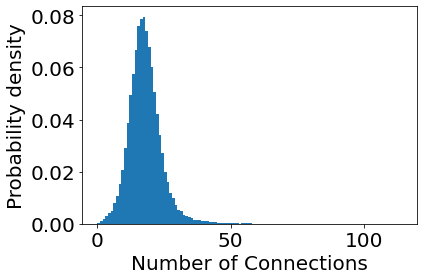

In [73]:
print(np.mean(network1['network_struct']['degrees']))
n = np.max(network1['network_struct']['degrees'])
plt.hist(network1['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_config1')
plt.show()

### Period 1 SBM

In [4]:
with open('../model_output_files/network_SBM1.json', 'r') as file:
    network1SBM = json.load(file)

4.40836


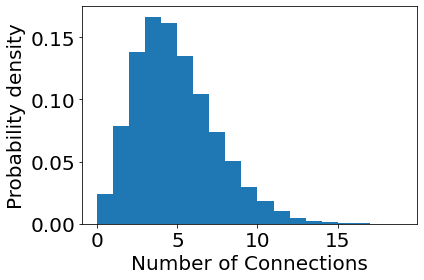

In [75]:
print(np.mean(network1SBM['network_struct']['degrees']))
n = np.max(network1SBM['network_struct']['degrees'])
plt.hist(network1SBM['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM1')
plt.show()

## Model Comparison Period 1

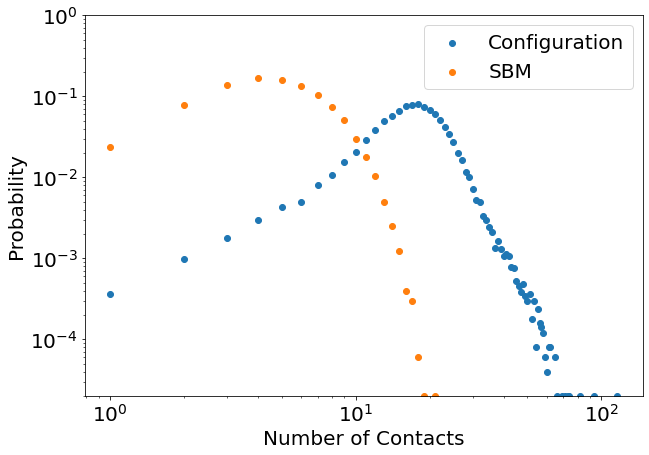

In [35]:
unique1 = np.unique(np.array(network1['network_struct']['degrees'])+1,return_counts=True)
unique2 = np.unique(np.array(network1SBM['network_struct']['degrees'])+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1[0], unique1[1]/sum(unique1[1]), label="Configuration")
ax.scatter(unique2[0], unique2[1]/sum(unique2[1]), label="SBM")
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Contacts")
ax.legend()
plt.savefig("../../../figures/random_graph_model_figs/degree_dist_comparison1.png")
plt.show()

### Period 2 Config

In [6]:
with open('../model_output_files/network_config2.json', 'r') as file:
    network2 = json.load(file)

22.2674


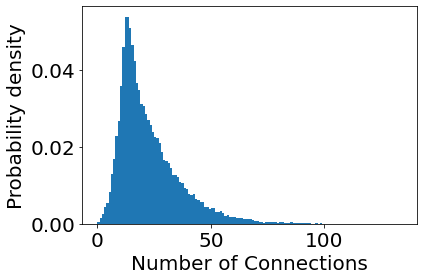

In [79]:
print(np.mean(network2['network_struct']['degrees']))
n = np.max(network2['network_struct']['degrees'])
plt.hist(network2['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM')
plt.show()

### Period 2 SBM

In [7]:
with open('../model_output_files/network_SBM2.json', 'r') as file:
    network2SBM = json.load(file)

7.64692


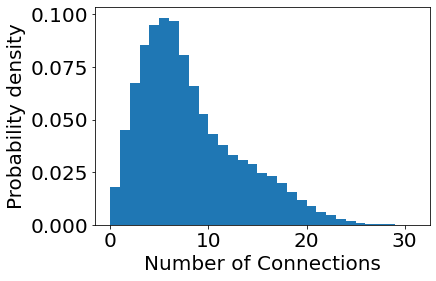

In [81]:
print(np.mean(network2SBM['network_struct']['degrees']))
n = np.max(network2SBM['network_struct']['degrees'])
plt.hist(network2SBM['network_struct']['degrees'], bins=list(range(int(n))), density=True)
plt.xlabel('Number of Connections')
plt.ylabel('Probability density')
plt.savefig('../../../figures/random_graph_model_figs/connection_dist_SBM')
plt.show()

## Model Comparison Period 1

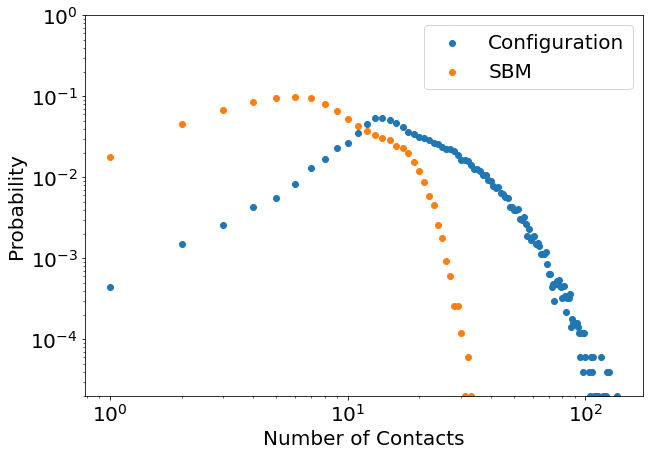

In [11]:
unique1 = np.unique(np.array(network2['network_struct']['degrees'])+1,return_counts=True)
unique2 = np.unique(np.array(network2SBM['network_struct']['degrees'])+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1[0], unique1[1]/sum(unique1[1]), label="Configuration")
ax.scatter(unique2[0], unique2[1]/sum(unique2[1]), label="SBM")
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Contacts")
ax.legend()
plt.savefig("../../../figures/random_graph_model_figs/degree_dist_comparison2.png")
plt.show()

# Secondary Case distributions, beta = 0.02

In [75]:
config1 = np.genfromtxt('../model_output_files/secondary_cases_config1.csv', delimiter=',')
config2 = np.genfromtxt('../model_output_files/secondary_cases_config2.csv', delimiter=',')

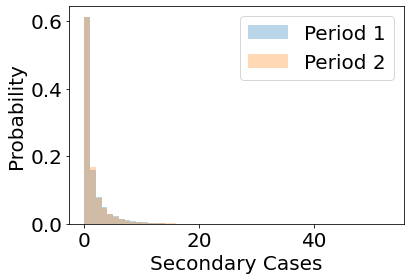

In [44]:
plt.hist(config1, bins=list(range(0,int(max(config1)))), density=True, label="Period 1", alpha=0.3)
plt.hist(config2, bins=list(range(0,int(max(config2)))), density=True, label="Period 2", alpha=0.3)
plt.legend()
plt.xlabel("Secondary Cases")
plt.ylabel("Probability")
plt.show()

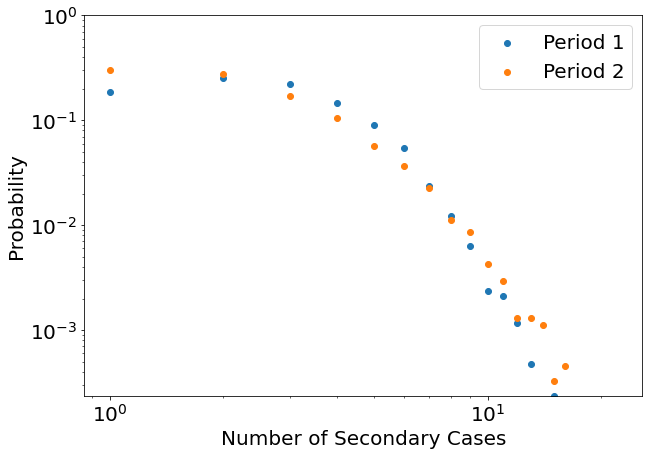

In [76]:
unique1 = np.unique(np.array(config1)+1,return_counts=True)
unique2 = np.unique(np.array(config2)+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1[0], unique1[1]/sum(unique1[1]), label="Period 1")
ax.scatter(unique2[0], unique2[1]/sum(unique2[1]), label="Period 2")
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Secondary Cases")
ax.legend()
# plt.savefig("../../../figures/random_graph_model_figs/secondary_cases_comparison.png")
plt.show()

## Fit to negative binomial

### Period 1

In [79]:
from scipy.stats import nbinom
from scipy.optimize import minimize
def negative_binomial_log_likelihood(params):
    r, p = params
    log_likelihood = nbinom.logpmf(config1, r, p)
    return -np.sum(log_likelihood)

# Initial parameter estimates
initial_r = 1
initial_p = 0.5

# Fit the negative binomial distribution using maximum likelihood estimation
result = minimize(negative_binomial_log_likelihood, x0=[initial_r, initial_p], method='Nelder-Mead')

# Extract the estimated parameters
estimated_r, estimated_p = result.x

3.74062247016824 0.6395118326477892
2.1085673825820157


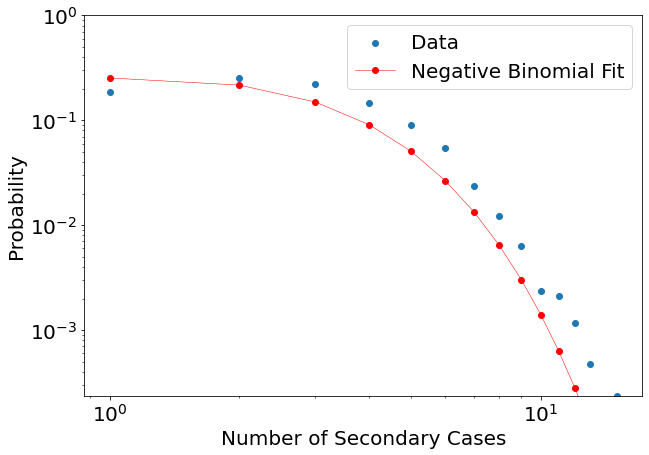

In [80]:
print(estimated_r, estimated_p)
print(np.mean(config1))
unique = np.unique(np.array(config1)+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
x = np.arange(1, np.max(config1) + 2)
ax.scatter(unique[0], unique[1]/sum(unique[1]), label="Data")
ax.plot(x, nbinom.pmf(x, estimated_r, estimated_p), 'ro-', lw=0.5,label="Negative Binomial Fit")
ax.set_ylim([min(unique[1]/sum(unique[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Secondary Cases")
ax.legend()
plt.savefig("../../../figures/random_graph_model_figs/fit_secondary_cases_config1")
plt.show()

### Period 2

In [81]:
from scipy.stats import nbinom
from scipy.optimize import minimize
def negative_binomial_log_likelihood(params):
    r, p = params
    log_likelihood = nbinom.logpmf(config2, r, p)
    return -np.sum(log_likelihood)

# Initial parameter estimates
initial_r = 1
initial_p = 0.5

# Fit the negative binomial distribution using maximum likelihood estimation
result = minimize(negative_binomial_log_likelihood, x0=[initial_r, initial_p], method='Nelder-Mead')

# Extract the estimated parameters
estimated_r, estimated_p = result.x

0.45879400519819025 1.4899220902357313
1.7575579497224942


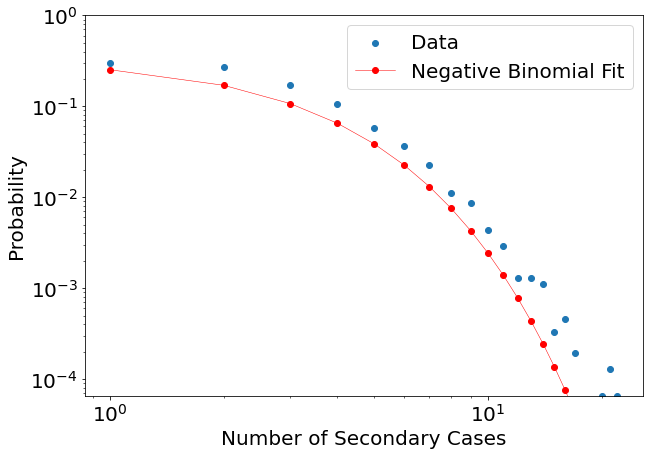

In [82]:
print(estimated_p, estimated_r)
print(np.mean(config2))
unique = np.unique(np.array(config2)+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
x = np.arange(1, np.max(config2) + 2)
ax.scatter(unique[0], unique[1]/sum(unique[1]), label="Data")
ax.plot(x, nbinom.pmf(x, estimated_r, estimated_p), 'ro-', lw=0.5,label="Negative Binomial Fit")
ax.set_ylim([min(unique[1]/sum(unique[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Secondary Cases")
ax.legend()
plt.savefig("../../../figures/random_graph_model_figs/fit_secondary_cases_config2")
plt.show()

# Secondary Case distributions, SBM beta = 0.1

In [83]:
SBM1 = np.genfromtxt('../model_output_files/secondary_cases_SBM1.csv', delimiter=',')
SBM2 = np.genfromtxt('../model_output_files/secondary_cases_SBM2.csv', delimiter=',')

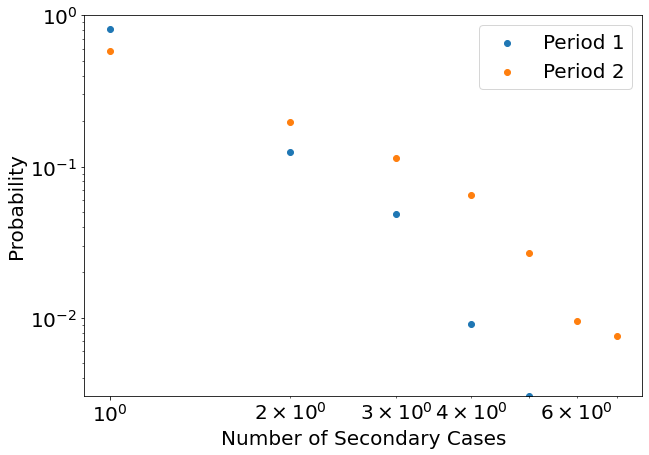

In [84]:
unique1 = np.unique(np.array(SBM1)+1,return_counts=True)
unique2 = np.unique(np.array(SBM2)+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1[0], unique1[1]/sum(unique1[1]), label="Period 1")
ax.scatter(unique2[0], unique2[1]/sum(unique2[1]), label="Period 2")
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Secondary Cases")
ax.legend()
# plt.savefig("../../../figures/random_graph_model_figs/secondary_cases_comparison.png")
plt.show()

## Fit to negative binomial

### Period 1

In [45]:
from scipy.stats import nbinom
from scipy.optimize import minimize
def negative_binomial_log_likelihood(params):
    r, p = params
    log_likelihood = nbinom.logpmf(SBM1, r, p)
    return -np.sum(log_likelihood)

# Initial parameter estimates
initial_r = 1
initial_p = 0.5

# Fit the negative binomial distribution using maximum likelihood estimation
result = minimize(negative_binomial_log_likelihood, x0=[initial_r, initial_p], method='Nelder-Mead')

# Extract the estimated parameters
estimated_r, estimated_p = result.x

## Configuration vs SBM

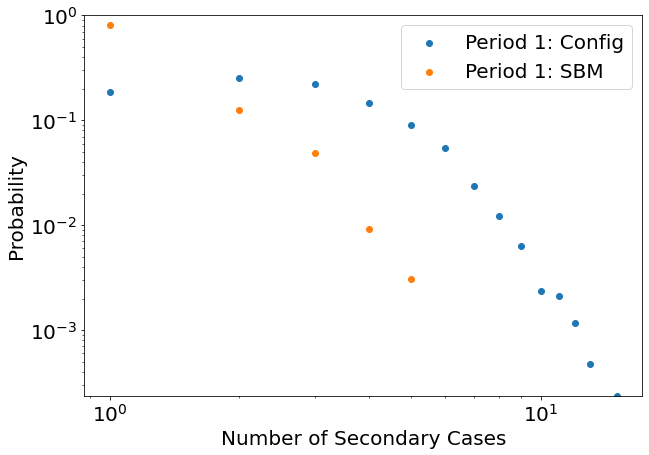

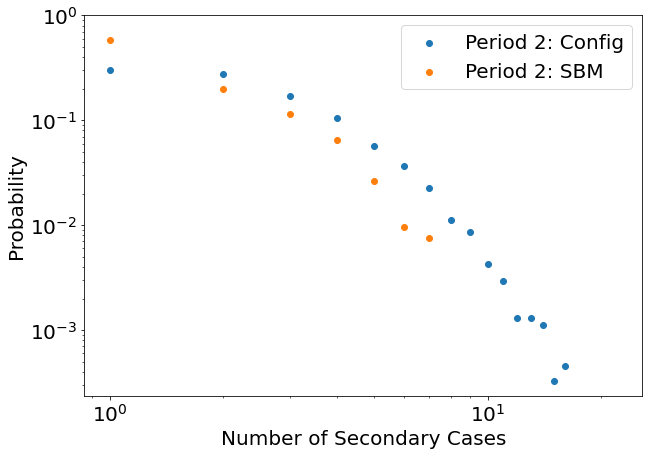

In [85]:
unique1 = np.unique(np.array(config1)+1,return_counts=True)
unique2 = np.unique(np.array(config2)+1,return_counts=True)
unique3 = np.unique(np.array(SBM1)+1,return_counts=True)
unique4 = np.unique(np.array(SBM2)+1,return_counts=True)
plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique1[0], unique1[1]/sum(unique1[1]), label="Period 1: Config")
ax.scatter(unique3[0], unique3[1]/sum(unique3[1]), label="Period 1: SBM")
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Secondary Cases")
ax.legend()
plt.savefig("../../../figures/random_graph_model_figs/secondary_cases_comparison1.png")
plt.show()

plt.figure(figsize=(10,7))
ax = plt.gca()
ax.scatter(unique2[0], unique2[1]/sum(unique2[1]), label="Period 2: Config")
ax.scatter(unique4[0], unique4[1]/sum(unique4[1]), label="Period 2: SBM")
ax.set_ylim([min(unique1[1]/sum(unique1[1])),1])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel("Probability")
ax.set_xlabel("Number of Secondary Cases")
ax.legend()
plt.savefig("../../../figures/random_graph_model_figs/secondary_cases_comparison2.png")
plt.show()